If you want to download the dataset so, you can easily download it from this link.
<https://www.kaggle.com/priyanshusahu23/loandataset/download

We start our literature review with more general systematic literature reviews that focus on the application of machine learning in the general field of Banking Risk Management. Since the global financial crisis, risk management in banks has to take a major role in shaping decision-making for banks. A major portion of risk management is the approval of loans to promising candidates. But the black-box nature of Machine learning algorithms makes many loan providers vary the result.

let's start with importing some modules

In [116]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sb 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Understanding the Dataset

The machine learning model is trained using the training data set. Every new applicant details filled at the time of application form acts as a test data set. On the basis of the training data sets, the model will predict whether a loan would be approved or not. We have 13 features in total out of which we have 12 independent variables and 1 dependent variable i.e. Loan_Status in train dataset and 12 independent variables in test dataset. The Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are all categorical

In [117]:
dataset = pd.read_csv("dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have 614 rows ans 13 columns. 12 independent variable and target variable:
(614, 13)

# Exploratory Data Analysis
# Univariate Visual Analysis

### Target Variable - Loan Status 

We will start first with an independent variable which is our target variable as well. We will analyse this categorical variable using a bar chart as shown below. The bar chart shows that loan of 422 ( around 69 % ) people out of 614 was approved

Y    422
N    192
Name: Loan_Status, dtype: int64

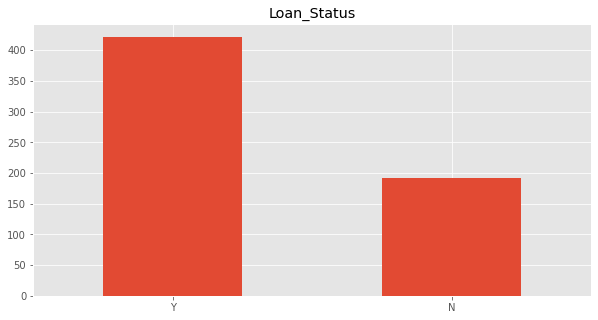

In [118]:
plt.style.use("ggplot")
dataset['Loan_Status'].value_counts().plot.bar(title='Loan_Status', rot=0, figsize=(10, 5))
display(dataset['Loan_Status'].value_counts())

The loan of 422(around 69%) people out of 614 were approved.

### Predictor Variables

There are 3 types of variables: Categorical, Ordinal & Numerical.

### Categorical Features 

* Gender
* Marrital Status
* Employment Type
* Credit History

#### It can be inferred from the below bar plots that in our observed data:

<AxesSubplot:title={'center':'Gender'}>

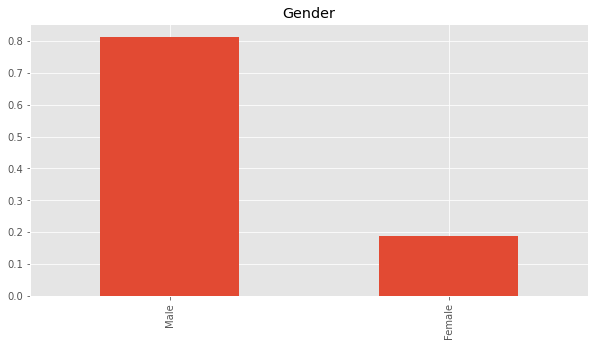

In [119]:
dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(10, 5), title='Gender')

* 80% of loan applicants are male in our train dataset

<AxesSubplot:title={'center':'Married'}>

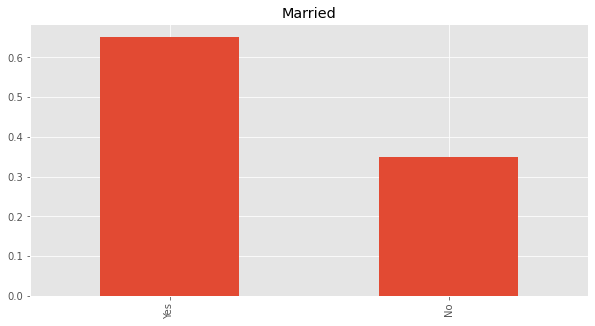

In [120]:
dataset['Married'].value_counts(normalize=True).plot.bar(figsize=(10, 5), title='Married')

* Nearly 70% are married

<AxesSubplot:title={'center':'Self Employed'}>

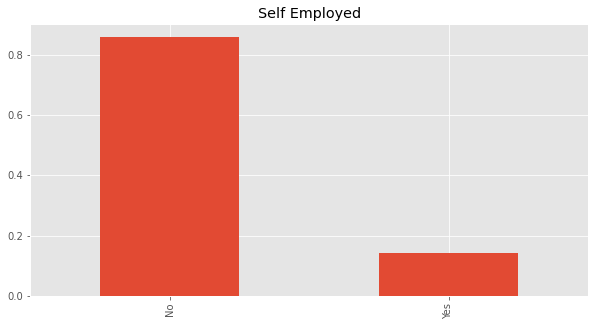

In [121]:
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10, 5), title='Self Employed')

* Nearly 85%-90% loan applicants are self-employed

<AxesSubplot:title={'center':'Credit History'}>

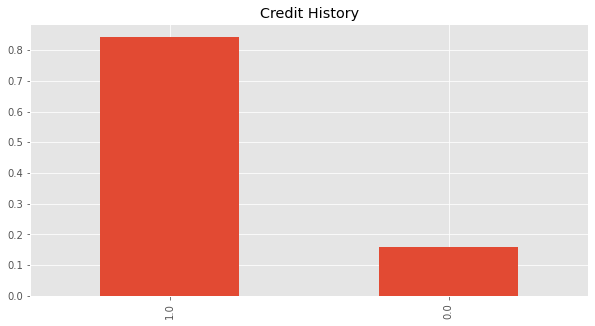

In [122]:
dataset['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10, 5), title='Credit History')





* The loan has been approved for more than 65% of applicants

### Ordinal Features

* Number of Dependents
* Education Level
* Property or Area Background

<AxesSubplot:title={'center':'Dependents'}>

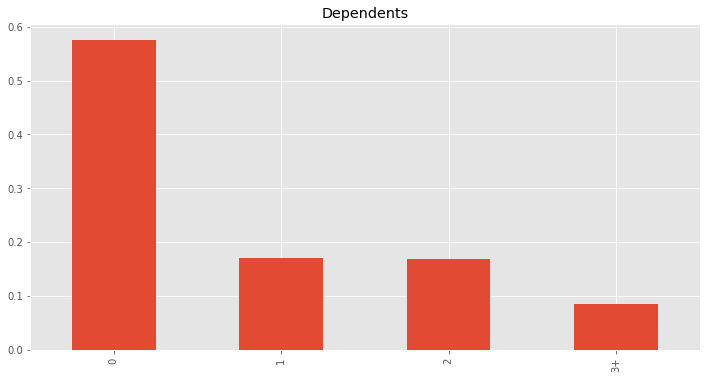

In [123]:
dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,6), title='Dependents')

 Almost 58% of the applicants have no dependencies

<AxesSubplot:title={'center':'Education'}>

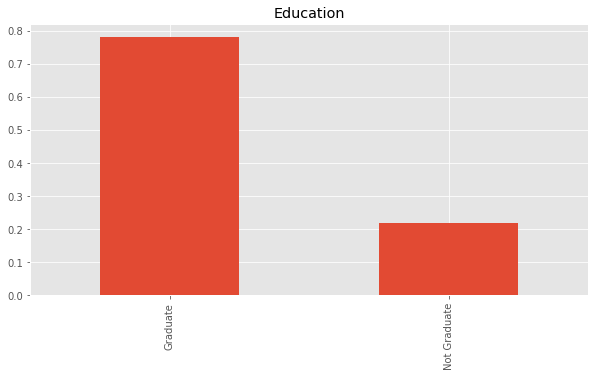

In [124]:
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education', figsize=(10, 5))

Around 80% of the applicants are Graduates.

<AxesSubplot:title={'center':'Property_Area'}>

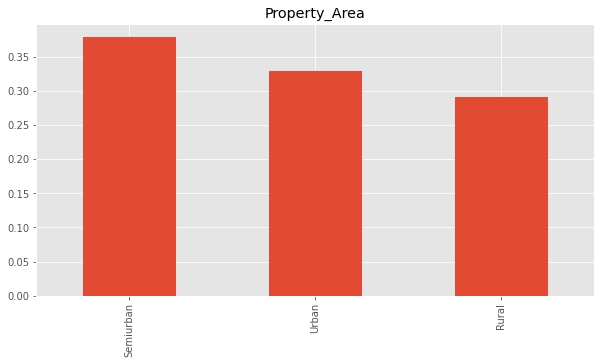

In [125]:
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', figsize=(10, 5))

Highest number of applicants are from semi Urban areas, followed by urban areas.

#### Numerical Features

* The Applicant's Income
* The Co-Applicant's Income

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

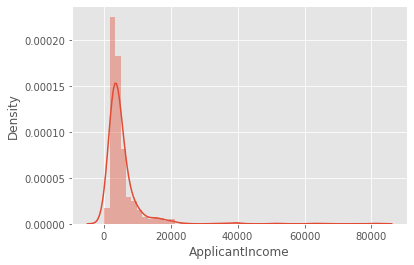

In [126]:
sb.distplot(dataset['ApplicantIncome'])

It can be inferred that most of the data in Applicant income is towards left which means it is not normally distributed. The catplot confirms the presence of outliers. This can be attributed to income disparity in the society.

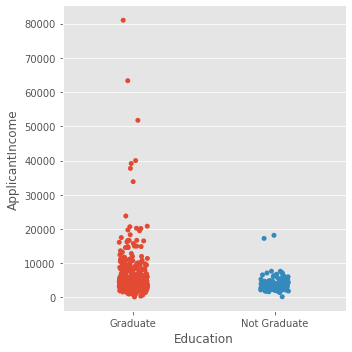

In [127]:
sb.catplot(x='Education', y='ApplicantIncome', data=dataset)

We can see that there are higher number of graduates with very high incomes, which are appearing to be the outliers

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

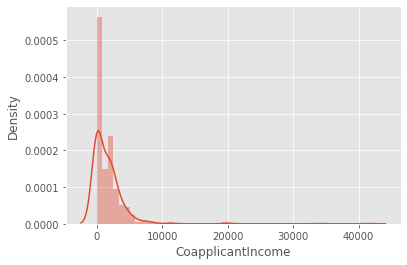

In [128]:
sb.distplot(dataset['CoapplicantIncome'])

CoapplicantIncome is lesser than applicantIncome and is within the 0 - 5000, again with some outliers.

### Bivariate Analysis

Bivariate analysis is finding some kind of empirical relationship between two variables. Specifically the dependent vs independent Variables

### Categorical Independent variable vs Target variable

<AxesSubplot:xlabel='Gender'>

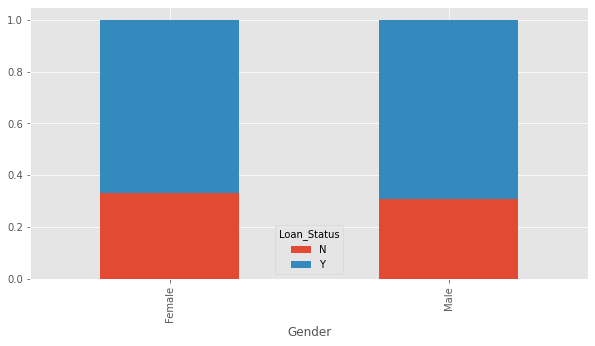

In [129]:
Gender = pd.crosstab(dataset['Gender'], dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

The proportion of male and female applicants is more or less the same for approved and unapproved loans.

<AxesSubplot:xlabel='Married'>

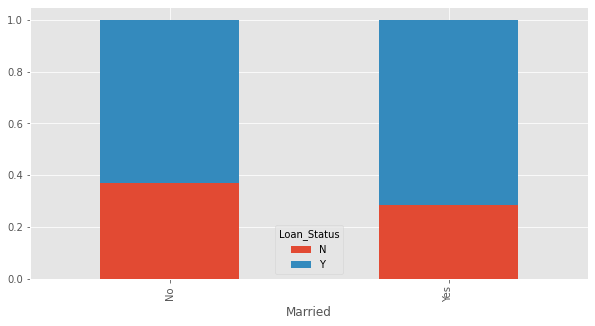

In [130]:
Married = pd.crosstab(dataset['Married'], dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

The proportion of married is higher for approved loans.

<AxesSubplot:xlabel='Dependents'>

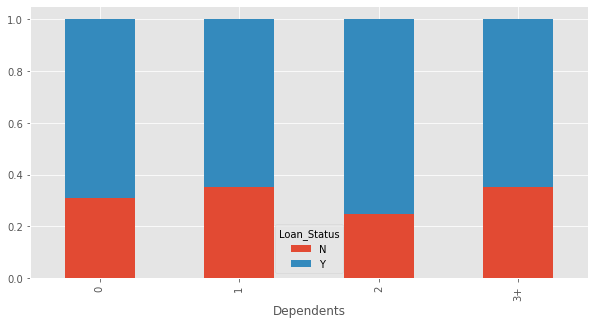

In [131]:
Dependents = pd.crosstab(dataset['Dependents'], dataset['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

<AxesSubplot:xlabel='Education'>

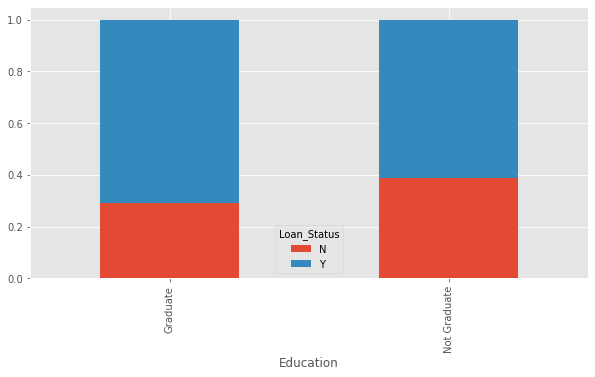

In [132]:
Education = pd.crosstab(dataset['Education'], dataset['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

The proportion of graduates applicants is higher for approved loans

<AxesSubplot:xlabel='Self_Employed'>

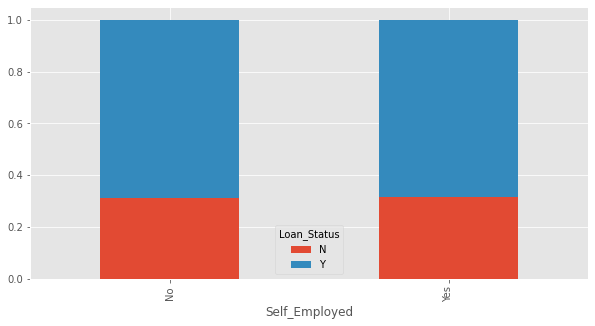

In [133]:
Self_Employed = pd.crosstab(dataset['Self_Employed'], dataset['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

There's nothing significant we can infer from Self_Employed vs Loan_Status.

<AxesSubplot:xlabel='Credit_History'>

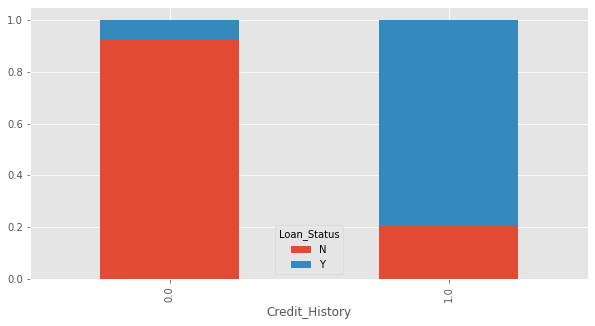

In [134]:
Credit_history = pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'])
Credit_history.div(Credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

It seems the credit history of one's is more likely to get their loans approved

<AxesSubplot:xlabel='Property_Area'>

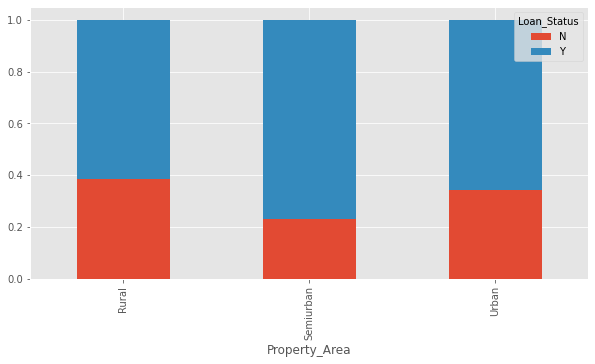

In [135]:
Property_Area = pd.crosstab(dataset['Property_Area'], dataset['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

The proportion of loans getting approved in the semi-urban area is higher than rural or urban areas.

### Numerical independent variable vs target variable

<AxesSubplot:xlabel='Loan_Status'>

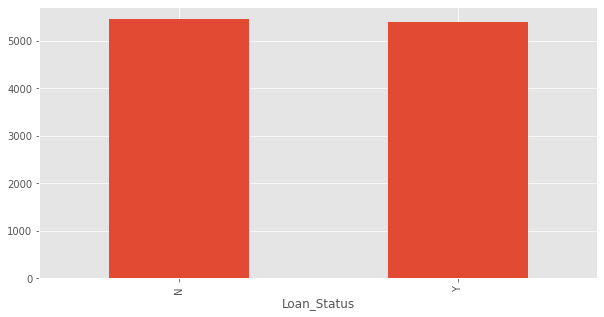

In [136]:
dataset.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar', figsize=(10, 5))

We need to make bins for understanding the data in better way

Text(0, 0.5, 'Percentage')

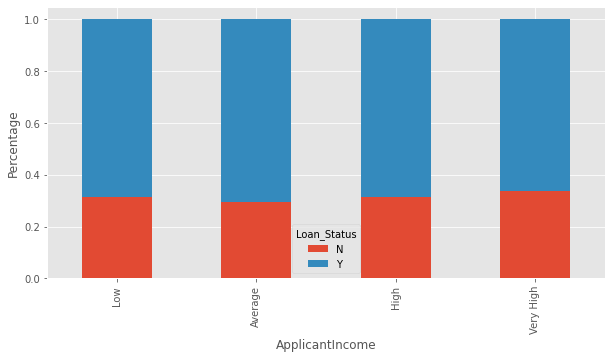

In [137]:
binns = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
dataset['Income Bin'] = pd.cut(dataset['ApplicantIncome'], bins=binns, labels=group)
Income_bin = pd.crosstab(dataset['Income Bin'], dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

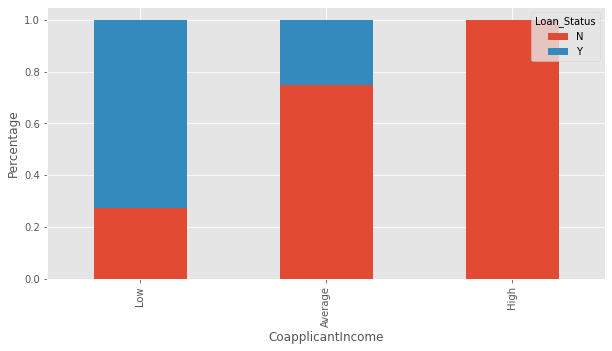

In [138]:
bins = [0, 10000, 30000, 42000]
group = ['Low', 'Average', 'High']
dataset['Coapplicant_Income_bin'] = pd.cut(dataset['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(dataset['Coapplicant_Income_bin'], dataset['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high.

Text(0, 0.5, 'Percentage')

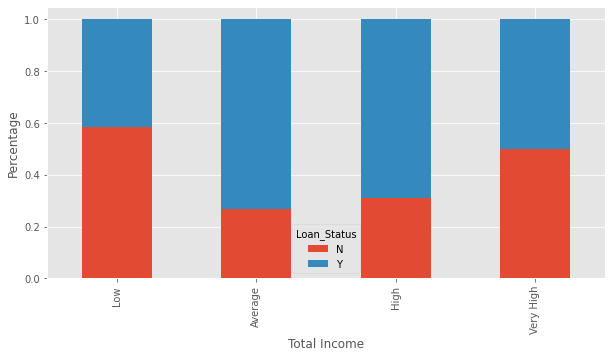

In [139]:
binns = [0, 2500, 4000, 60000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
dataset['Total_Income'] = dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['Total_Income'] = pd.cut(dataset['Total_Income'], bins=binns, labels=group)
Total_Income = pd.crosstab(dataset['Total_Income'], dataset['Loan_Status'])
Total_Income.div(Total_Income.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Total Income')
plt.ylabel('Percentage')

we can see that proportion of loans getting approved for applicants having low income is very less as compared to average, high and very high Income.

Let's visualize the Loan Amount variable.

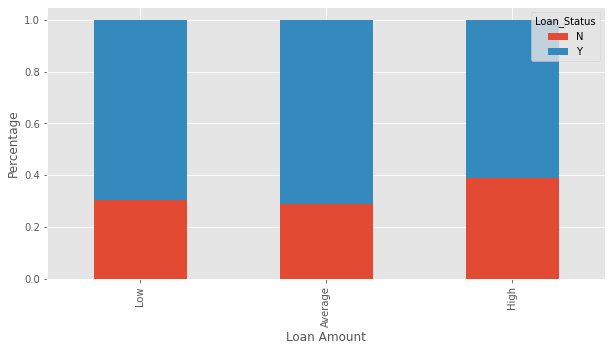

In [140]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
dataset['LoanAmount_bin'] = pd.cut(dataset['LoanAmount'], bins=bins, labels=group)
LoanAmount_bin = pd.crosstab(dataset['LoanAmount_bin'], dataset['Loan_Status'])
LoanAmount_bin = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel("Loan Amount")
p=plt.ylabel("Percentage")

it can be seen that the proportion of approved loans is higher for low and average loan amount as compared to that high loan amount which supports our hypothesis in which we considered the chances of loan approval is high when the loan amount is less

# Data Cleaning

### Converting Categorical Values to Numerical Variables

We drop the bins which we created for our exploration part. We will change the 3+ in dependents variables to 3 to make it a numerical variable.

We will also convert the target variable's categories to 0 and 1 so, that we can find it's correlation with numerical variables. One another reason to do so is few model like logistic regression takes only numerical data as input. We will replace N with 0 and Y with 1.

In [141]:
dataset = dataset.drop(['Income Bin', 'Coapplicant_Income_bin', 'Total_Income', 'LoanAmount_bin'], axis=1)
dataset['Dependents'].replace('3+', 3, inplace=True)
dataset['Loan_Status'].replace('N', 0, inplace=True)
dataset['Loan_Status'].replace('Y', 1, inplace=True)

Now we will look at the correlation between all numerical variable. We will use the Heat Map to visualize data through variation in coloring. The variable with darker color means their correlation is more.

<AxesSubplot:>

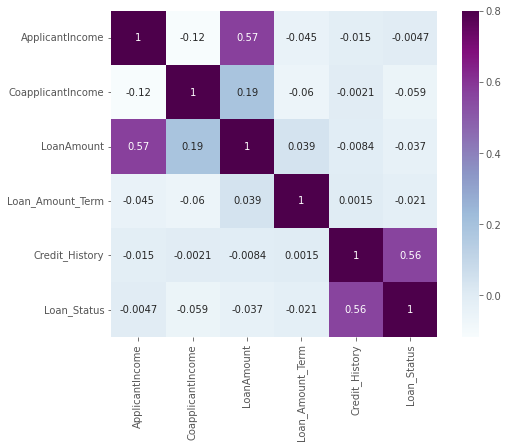

In [142]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sb.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that most correlate variables are (Applicant_Income--LoanAmount) and (Credit_History--LoanStatus)

### Missing value imputation
let's list our feature-wise count of missing values

In [143]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, married, self_Employed, LoanAmount, Loan_Amount_Term and Credit_History.

We will treat missing values in all features one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variable: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. 

In [144]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

Now try to find a way to fill the missing values in Loan_Amount_Term.
We will look at the value count of loan amount term variable.

In [145]:
dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see in the Loan Amount Term variable, the value of 360 is repeating the most of the times. So, we will using mode in it to deal with missing values

In [146]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

Now, we will see Loan amount variable. As it is numerical variable we will use mean or median to handle the missing values

In [147]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)

Now Let's check all the missing values are filled or not in our dataset

In [148]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers Treatment

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation.

<AxesSubplot:>

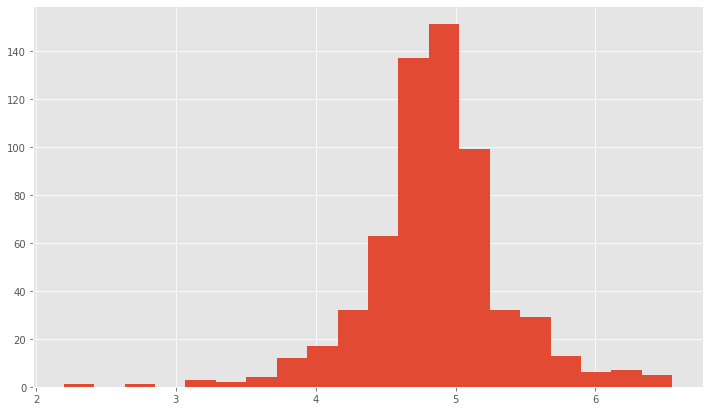

In [149]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20, figsize=(12, 7 ))

Now the distribution looks much closer to and the effect of extreme values has been significantly subsided. Let's build our logistic regression model and make prediction for our data set. 

### Model Building : Part I

let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Let's drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the dataset.

In [150]:
dataset = dataset.drop(['Loan_ID'], axis=1)

We will sue scikit-learn for making different models which is an open source library in Python. It is one of the most useful tools which many efficient built-inn functions that can be used for modeling in Python.

scikit-learn required target variable in a separate dataset. So, we will drop our target variable from our dataset and save it in another dataset.

In [151]:
X = dataset.drop('Loan_Status', axis=1)
y = dataset.Loan_Status

Now we will make dummy variable for the categorical variables. The dummy variable turns categorical data into series of 0 and 1, making them a lot easier to quantify and compare.

In [152]:
X = pd.get_dummies(X)
dataset = pd.get_dummies(dataset)

Now we will train the model on the dataset and make predictions. But can we validate these predictions? One way of doing this is we can divide our dataset into two parts: train and validation. We can train the model on this training part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true predictions for the validation part.

In [153]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The dataset has been divided into training and validation part. Let us initialize LogisticRegression and accuracy_score from sklearn and fit the model.

In [154]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

Here the C parameter represent the inverse of regularization strength.
Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let's predict the Loan_Status for the validation set and calculate its accuracy.

In [155]:
predictions = logistic_model.predict(x_test)
accuracy_score(y_test, predictions)

0.7621621621621621

So, our predictions is almost 80% accurate

### Logistic Regression using Stratified k-folds cross validation

To check how robust model to unseen data, we can use Validation. It is a technique that involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

* the validation set approach
* k-fold cross validation
* Leave one out cross-validation (LOOCV)
* Stratified k-fold cross-validation

We will use Stratified k-fold cross-validation.

Now Let's make a Cross-validation logistic model with stratified 5 folds and make predictions for the dataset.

In [156]:
mean_val = []
i = 1
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    mean_val.append(score)
    print(f'{i} of Kfold {kf.n_splits} \n')
    print(score)
    i += 1
print("Mean Validation Accuracy\n", np.mean(mean_val))

1 of Kfold 5 

0.8048780487804879
2 of Kfold 5 

0.7723577235772358
3 of Kfold 5 

0.7886178861788617
4 of Kfold 5 

0.7723577235772358
5 of Kfold 5 

0.8032786885245902
Mean Validation Accuracy
 0.7882980141276823


The mean validation accuracy for this model turns out to be 0.80. Let's us visualize the roc curve.

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income--As discussed during bivariate analysis we will combine the applicant income and co-applicant income. if the total Income is high. chances of chances of loan approval might also be high.


* EMI -- EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI's might find difficult to pay back the loan. we can calculate the EMI by taking ratio of the loan amount with respect to the loan amount term.


* Balance Income -- this is the Income left the EMI has paid been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of approval.

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

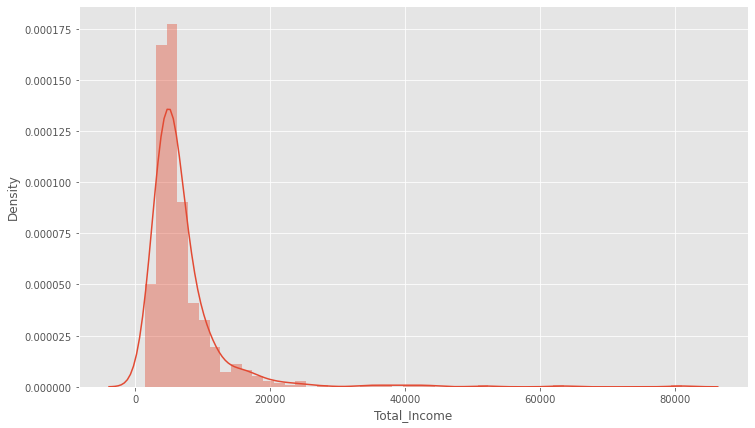

In [157]:
dataset['Total_Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
plt.figure(figsize=(12, 7))
sb.distplot(dataset['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right- skewed. So, let's take the log transformation to make the distribution normal.

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

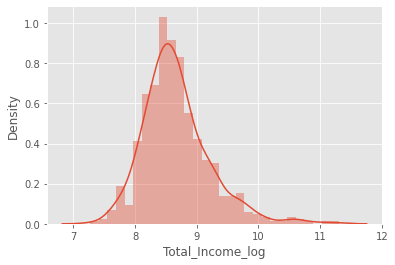

In [158]:
dataset['Total_Income_log'] = np.log(dataset['Total_Income'])
sb.distplot(dataset['Total_Income_log'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let's create the EMI feature now.

In [159]:
dataset['EMI']=dataset['LoanAmount']/dataset['Loan_Amount_Term']

Let's check the distribution of the EMI variable.

<AxesSubplot:xlabel='EMI', ylabel='Density'>

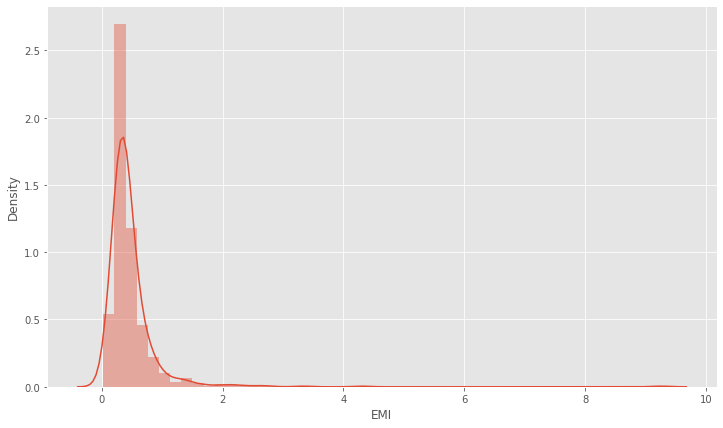

In [160]:
plt.figure(figsize=(12, 7))
sb.distplot(dataset['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

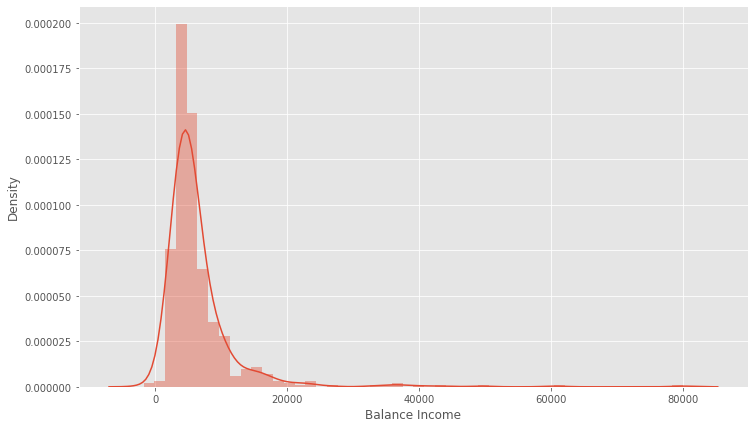

In [161]:
dataset['Balance Income'] = dataset['Total_Income']-(dataset['EMI']*1000)
plt.figure(figsize=(12, 7))
sb.distplot(dataset['Balance Income'])

Let us now drop the variables which we used to create these new features. The reason for doing this is, the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [162]:
dataset = dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

## Model Building: Part II

After creating new features, we can continue the model building process. So we will start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost. We will build the following models in this section.

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost


Let's prepare the data for feeding into the models.

In [163]:
X = dataset.drop(['Loan_Status'], axis=1)
y = dataset.Loan_Status

## Logistic Regression

In [164]:
mean_val = []
i = 1
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    mean_val.append(score)
    print(f'{i} of Kfold {kf.n_splits} \n')
    print(score)
    i += 1
print("Mean Validation Accuracy\n", np.mean(mean_val))

1 of Kfold 5 

0.6991869918699187
2 of Kfold 5 

0.7642276422764228
3 of Kfold 5 

0.7804878048780488
4 of Kfold 5 

0.8211382113821138
5 of Kfold 5 

0.6885245901639344
Mean Validation Accuracy
 0.7507130481140878


## Decision Tree



Let's fit the decision tree model with 5 folds of cross validation.

In [165]:
mean_val = []
i = 1
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = DecisionTreeClassifier(random_state=13)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    mean_val.append(score)
    print(f'{i} of Kfold {kf.n_splits} \n')
    print(score)
    i += 1
print("Mean Validation Accuracy\n", np.mean(mean_val))

1 of Kfold 5 

0.6747967479674797
2 of Kfold 5 

0.7073170731707317
3 of Kfold 5 

0.6829268292682927
4 of Kfold 5 

0.6666666666666666
5 of Kfold 5 

0.7049180327868853
Mean Validation Accuracy
 0.6873250699720111


## Random Forest



In [166]:
mean_val = []
i = 1
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=13)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    mean_val.append(score)
    print(f'{i} of Kfold {kf.n_splits} \n')
    print(score)
    i += 1
print("Mean Validation Accuracy\n", np.mean(mean_val))

1 of Kfold 5 

0.8292682926829268
2 of Kfold 5 

0.7317073170731707
3 of Kfold 5 

0.7560975609756098
4 of Kfold 5 

0.7723577235772358
5 of Kfold 5 

0.7950819672131147
Mean Validation Accuracy
 0.7769025723044116


We will try to improve the accuracy by tuning the hyper-parameters for this model. We will use a grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.


We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in the random forest model.

## Grid Search

In [167]:
paramgrid = {'max_depth': list(range(1, 20)), 'n_estimators': list(range(1, 200, 10))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=paramgrid)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101, 111, 121, 131, 141, 151, 161,
                                          171, 181, 191]})

In [168]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=151, random_state=1)

In [171]:
mean_val = []
i = 1
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier(max_depth=3, n_estimators=151, random_state=23)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = accuracy_score(y_test, predictions)
    mean_val.append(score)
    print(f'{i} of Kfold {kf.n_splits} \n')
    print(score)
    i += 1
print("Mean Validation Accuracy\n", np.mean(mean_val))

1 of Kfold 5 

0.8211382113821138
2 of Kfold 5 

0.7804878048780488
3 of Kfold 5 

0.8699186991869918
4 of Kfold 5 

0.7804878048780488
5 of Kfold 5 

0.7786885245901639
Mean Validation Accuracy
 0.8061442089830735


### Conclusion:
We did Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.

We did univariate and bivariate analysis to see impact of one another on their features using charts.

We analysed each variable to check if data is cleaned and normally distributed.

We cleaned the data and removed NA values.

We calculated correlation between independent variables and found that applicant income and loan amount have significant relation.

We created dummy variables for constructing the model.

Finally, we got a model with co-applicant income and credit history as independent variable with highest accuracy.

We tested the data and got the accuracy of 81 %